# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [1]:
# ドライブのマウント
from google.colab import drive
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード
drive.mount('/content/drive')


Mounted at /content/drive


## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [2]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=950f53a8f565f9506283642c0038297eeeeedb280a12d058c05a8e148048d5cf
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

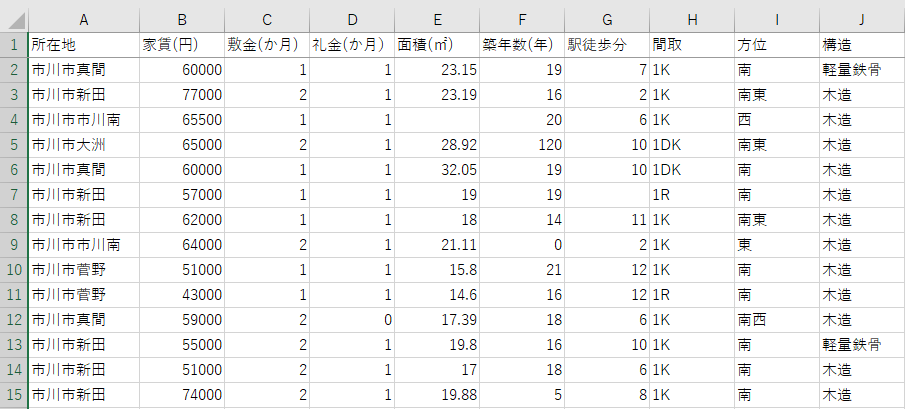

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [3]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [4]:
import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/house_rent.csv',encoding="cp932")

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [5]:
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [6]:
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [7]:
df['礼金(か月）'].value_counts()


1.0    246
2.0     29
0.0     28
0.5      1
Name: 礼金(か月）, dtype: int64

In [8]:
df['敷金(か月)'].value_counts()


2    166
1    129
0      9
Name: 敷金(か月), dtype: int64

In [9]:
df['間取'].value_counts()


1K     229
1R      44
1DK     31
Name: 間取, dtype: int64

In [10]:
df['構造'].value_counts()

木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64

## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [11]:
#間取と構造をダミー化して、データフレームに結合
madori = pd.get_dummies(df['間取'],drop_first=True)
kouzou = pd.get_dummies(df['構造'],drop_first=True)

df2 = pd.concat([df,madori],axis=1)
df3 = pd.concat([df2,kouzou],axis=1)

#既存の間取と構造を削除
df3 = df3.drop(['間取'],axis=1)
df3 = df3.drop(['構造'],axis=1)

df3.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,方位,1K,1R,軽量鉄骨,鉄骨造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,南,1,0,1,0
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,南東,1,0,0,0
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,西,1,0,0,0
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,南東,0,0,0,0
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,南,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [12]:
training,test = train_test_split(df3,test_size=0.2,random_state=0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [13]:
#欠損値をカウント
training.isnull().sum()

所在地       0
家賃(円)     0
敷金(か月)    0
礼金(か月）    0
面積(㎡)     1
築年数(年)    1
駅徒歩分      1
方位        0
1K        0
1R        0
軽量鉄骨      0
鉄骨造       0
dtype: int64

In [14]:
#欠損値を平均値で補填
training_mean = training.mean()
training2 = training.fillna(training_mean)

training2.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,方位,1K,1R,軽量鉄骨,鉄骨造
176,市川市市川南,69000,2,1.0,19.87,1.0,2.0,西,1,0,0,1
26,市川市新田,70000,2,2.0,31.53,28.0,8.0,南,0,0,0,0
74,市川市大洲,65000,2,1.0,28.92,12.0,10.0,南東,0,0,0,0
101,市川市市川,51000,1,1.0,20.50,20.0,2.0,南,1,0,0,0
154,市川市新田,72000,2,1.0,20.70,0.0,2.0,東,1,0,0,0


In [15]:
#欠損値がなくなったか確認
training2.isnull().sum()

所在地       0
家賃(円)     0
敷金(か月)    0
礼金(か月）    0
面積(㎡)     0
築年数(年)    0
駅徒歩分      0
方位        0
1K        0
1R        0
軽量鉄骨      0
鉄骨造       0
dtype: int64

## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_

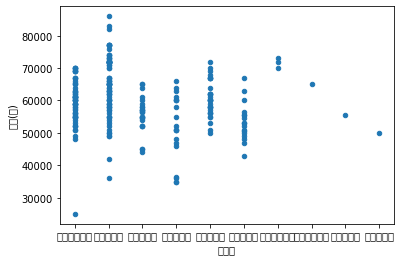

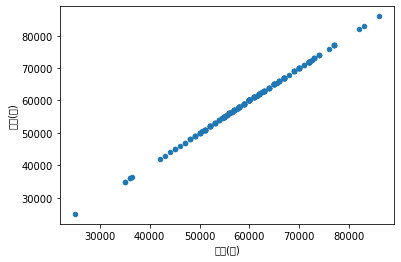

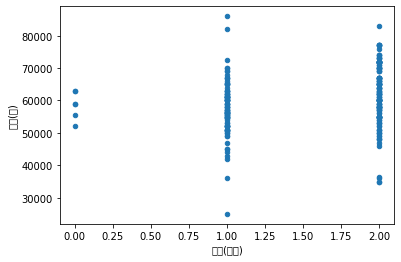

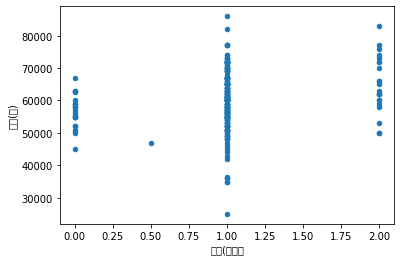

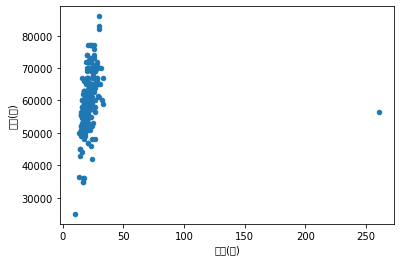

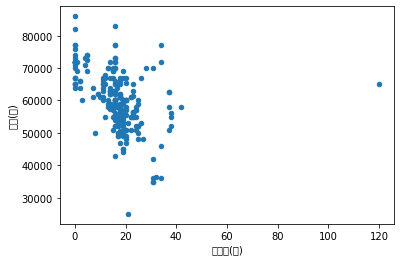

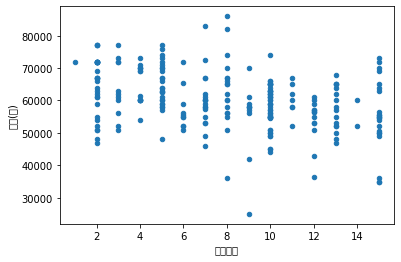

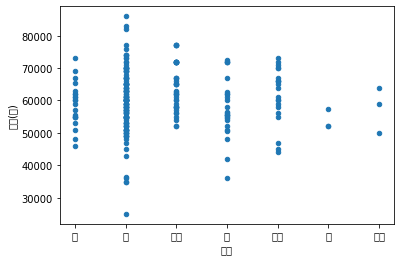

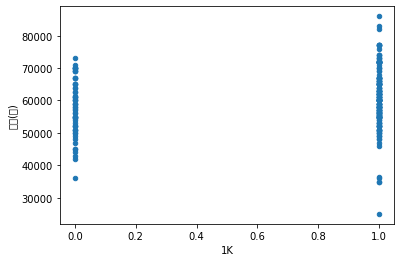

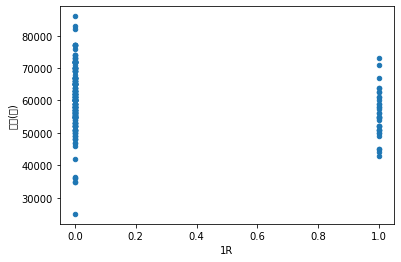

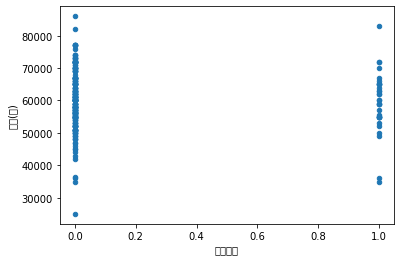

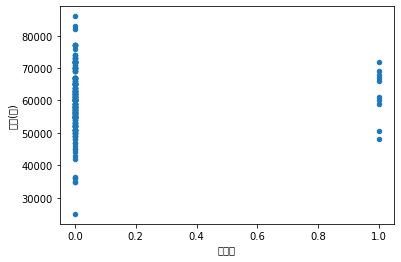

In [16]:
#全ての列との散布図を表示し、規則性のある列を特定
col1 = training2.columns
for col1_name in col1:
  training2.plot(kind = 'scatter',x = col1_name,y = '家賃(円)')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text

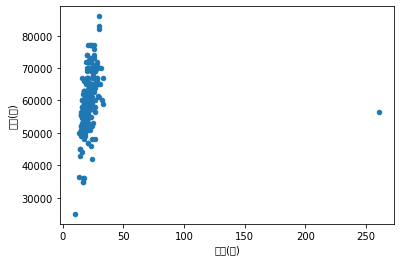

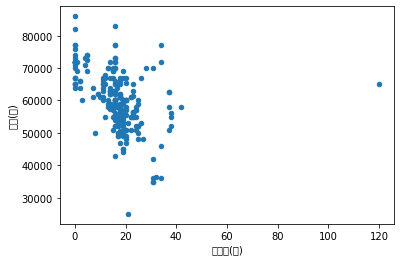

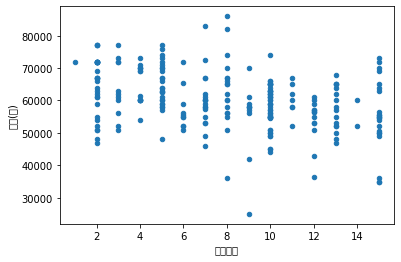

In [17]:
#特徴量として使えそうな列をピックアップ
col2 = ('面積(㎡)','築年数(年)','駅徒歩分')
for col2_name in col2:
  training2.plot(kind = 'scatter',x = col2_name,y = '家賃(円)')



In [18]:
#外れ値を削除
cat_row1 = training2[(training2['面積(㎡)'] > 200)]
cat_row2 = training2[(training2['築年数(年)'] > 100)]
cat_row3 = training2[(training2['家賃(円)'] < 30000) & (training2['駅徒歩分'] > 8)]

training3 = training2.drop([95],axis=0)
training4 = training3.drop([3],axis=0)
training5 = training4.drop([224],axis=0)

## 問題９　外れ値処理の結果を表示してください。

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text

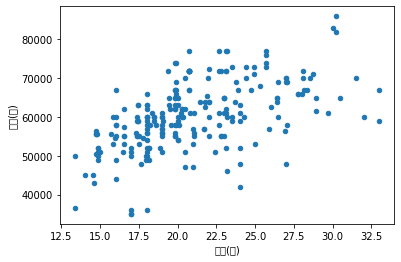

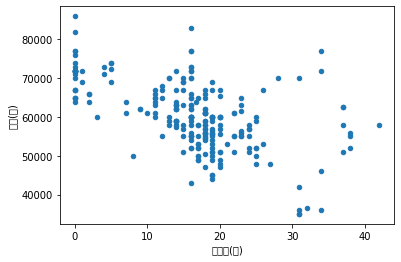

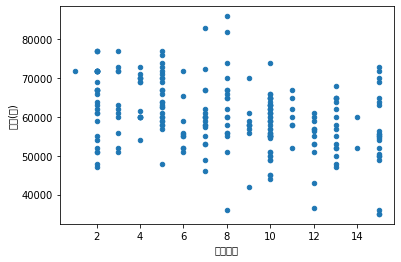

In [19]:
#外れ値を削除した結果を表示
for col2_name in col2:
  training5.plot(kind = 'scatter',x = col2_name,y = '家賃(円)')


## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [20]:
#家賃とその他の列の相関関係を絶対値・降順で表示
training_price = training5.corr()['家賃(円)']

training_price_abs = training_price.map(abs)
training_price_abs.sort_values(ascending=False)


家賃(円)     1.000000
築年数(年)    0.565356
面積(㎡)     0.537035
駅徒歩分      0.374357
礼金(か月）    0.214645
敷金(か月)    0.210300
1R        0.208472
1K        0.157105
鉄骨造       0.040995
軽量鉄骨      0.038390
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [21]:
#相関が0.5以上を特徴量として抽出
col = ['築年数(年)','面積(㎡)']
a = training5[col]
b = training5[['家賃(円)']]

a.head(5)

,築年数(年),面積(㎡)
176,1.0,19.87
26,28.0,31.53
74,12.0,28.92
101,20.0,20.50
154,0.0,20.70


In [22]:
b.head(5)

,家賃(円)
176,69000
26,70000
74,65000
101,51000
154,72000


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [23]:
#訓練データを、訓練データと検証データに分割
col3 = ['築年数(年)','面積(㎡)']
aa = training5[col3]
bb = training5[['家賃(円)']]
a_training,a_value,b_training,b_value = train_test_split(aa,bb,test_size=0.2,random_state=0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [24]:
from sklearn.preprocessing import StandardScaler

#標準化を行い、決定係数を算出
sc_mdl_a = StandardScaler()
sc_mdl_a.fit(a_training)
sc_a = sc_mdl_a.transform(a_training)

sc_mdl_b = StandardScaler()
sc_mdl_b.fit(b_training)
sc_b = sc_mdl_b.transform(b_training)

sc_a_value = sc_mdl_a.transform(a_value)
sc_b_value = sc_mdl_b.transform(b_value)

mdl = LinearRegression()
mdl.fit(sc_a,sc_b)
mdl.score(sc_a_value,sc_b_value)

0.4163893946239695

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [28]:
#標準化したデータを戻す
sc_model_a2 = sc_mdl_a.inverse_transform(sc_a_value)
sc_model_b2 = sc_mdl_b.inverse_transform(sc_b_value)

#データを再学習させる
mdl2 = LinearRegression()
mdl2.fit(sc_model_a2, sc_model_b2)


test_data = [[3, 30]]
mdl2.predict(test_data)

array([[75545.17543979]])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [29]:
#現在の特徴量を表示
a_training.head(5)

,築年数(年),面積(㎡)
155,38.0,21.06
172,16.0,18.50
118,16.0,19.80
23,34.0,18.00
9,16.0,14.60


In [30]:
#特徴量に’駅徒歩分’を追加
col4 = ['築年数(年)','面積(㎡)','駅徒歩分']
aaa = training5[col4]
bbb = training5[['家賃(円)']]
aa_training,aa_value,bb_traignin,bb_value = train_test_split(aaa,bbb,test_size=0.2,random_state=0)
aa_training.head(5)

,築年数(年),面積(㎡),駅徒歩分
155,38.0,21.06,6.0
172,16.0,18.50,13.0
118,16.0,19.80,10.0
23,34.0,18.00,8.0
9,16.0,14.60,12.0


## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [31]:
#特徴量を追加したので、標準化のやり直し
sc_mdl_aa = StandardScaler()
sc_mdl_aa.fit(aa_training)
sc_aa = sc_mdl_aa.transform(aa_training)

sc_mdl_bb = StandardScaler()
sc_mdl_bb.fit(bb_traignin)
sc_bb = sc_mdl_bb.transform(bb_traignin)

sc_aa_value = sc_mdl_aa.transform(aa_value)
sc_bb_value = sc_mdl_bb.transform(bb_value)

mdl = LinearRegression()
mdl.fit(sc_aa,sc_bb)
mdl.score(sc_aa_value,sc_bb_value)

0.5307709216459263

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [32]:
#テストデータを使ってモデルを評価
test2 = test.fillna(training.mean())
test2.isnull().sum()

a_test = test2[col4]
b_test = test2[['家賃(円)']]

sc_a_test = sc_mdl_aa.transform(a_test)
sc_b_test = sc_mdl_bb.transform(b_test)

mdl.score(sc_a_test,sc_b_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0.7505323902805903

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [33]:
import pickle
with open('house_rent.pkl','wb') as f:
  pickle.dump(mdl,f)
with open('house_rent_scx.pki','wb') as f:
  pickle.dump(sc_mdl_aa,f)
with open('house_rent_scy.pki','wb') as f:
  pickle.dump(sc_mdl_bb,f)
